In [150]:
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd 
import gmaps

In [135]:
csv = "fire_clean.csv"
fires_pd = pd.read_csv("fire_clean.csv")
fires_pd.head(100)

,FOD_ID,SOURCE_SYSTEM,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,STAT_CAUSE_DESCR,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,STATE
0,1,FS-FIRESTAT,Plumas National Forest,2005,Miscellaneous,0.10,A,40.036944,-121.005833,CA
1,2,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.25,A,38.933056,-120.404444,CA
2,3,FS-FIRESTAT,Eldorado National Forest,2004,Debris Burning,0.10,A,38.984167,-120.735556,CA
3,4,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.913333,CA
4,5,FS-FIRESTAT,Eldorado National Forest,2004,Lightning,0.10,A,38.559167,-119.933056,CA
...,...,...,...,...,...,...,...,...,...,...
95,97,FS-FIRESTAT,Humboldt-Toiyabe National Forest,2005,Debris Burning,0.10,A,38.700278,-119.840556,CA
96,98,FS-FIRESTAT,Humboldt-Toiyabe National Forest,2005,Arson,0.01,A,38.453611,-119.458611,CA
97,99,FS-FIRESTAT,Carson National Forest,2005,Lightning,0.10,A,36.669444,-107.253611,NM
98,100,FS-FIRESTAT,Carson National Forest,2005,Lightning,0.25,A,36.876389,-107.219167,NM


In [136]:
average_size = fires_pd.groupby(fires_pd["FIRE_YEAR"]).mean()["FIRE_SIZE"]
years = pd.DataFrame({
    "Average Size of Fire":average_size
})
years

,Average Size of Fire
FIRE_YEAR,
1992,32.364222
1993,35.356208
1994,54.198875
1995,28.676755
1996,79.460604
1997,52.313024
1998,29.414983
1999,68.039342
2000,79.234760


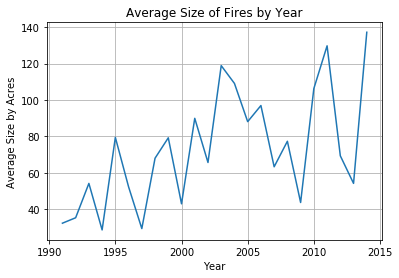

In [137]:
x_axis = np.arange(1991,2015,1)
y_axis = years
plt.plot(x_axis, y_axis) 
plt.title("Average Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Average Size by Acres")
plt.grid()
plt.show()

In [138]:
total_size = (round(fires_pd.groupby(fires_pd["FIRE_YEAR"]).sum()["FIRE_SIZE"],2)) / 1000000
size_years = pd.DataFrame({
    "Total Size of Fire":total_size
})
size_years

,Total Size of Fire
FIRE_YEAR,
1992,2.199958
1993,2.191696
1994,4.116676
1995,2.049585
1996,6.005156
1997,3.214635
1998,2.011102
1999,6.080200
2000,7.639499


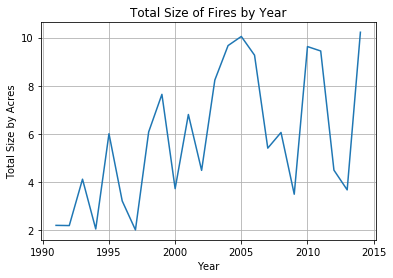

In [139]:
x_axis_2 = np.arange(1991,2015,1)
y_axis_2 = size_years
plt.plot(x_axis_2, y_axis_2) 
plt.title("Total Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Total Size by Acres")
plt.grid()
plt.show()

In [140]:
state = fires_pd["STATE"]
cause = fires_pd["STAT_CAUSE_DESCR"]
causing_fire = cause.value_counts()
causing_fire

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

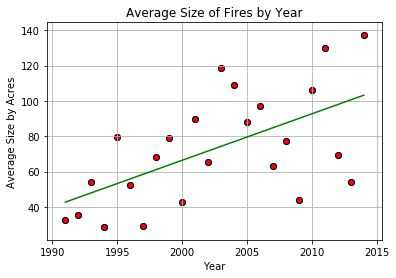

The r-squared is: 0.5874207511728418


In [141]:
x_values = np.arange(1991,2015,1)
y_values = average_size
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"g")
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black") 
plt.title("Average Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Average Size by Acres")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

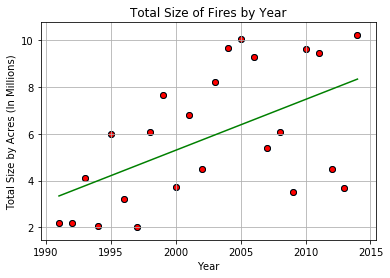

The r-squared is: 0.542743540189615


In [142]:
x_values_2 = np.arange(1991,2015,1)
y_values_2 = total_size
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values_2, y_values_2)
regress_values_2 = x_values_2 * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values_2,y_values_2)
plt.plot(x_values_2,regress_values_2,"g")
plt.scatter(x_axis_2, y_axis_2, marker="o", facecolors="red", edgecolors="black") 
plt.title("Total Size of Fires by Year")
plt.xlabel("Year")
plt.ylabel("Total Size by Acres (In Millions)")
plt.grid()
plt.show()
print(f"The r-squared is: {rvalue}")

In [143]:
coordinates = fires_pd["LATITUDE"].map(str) + " , " + fires_pd["LONGITUDE"].map(str)
states_coordinate = fires_pd["STATE"]
fire_size_coordinate = fires_pd["FIRE_SIZE"]
coordinates_df = pd.DataFrame({
    "Coordinates":coordinates,
    "State":states_coordinate,
    "Fire Size by Acres":fire_size_coordinate
}
)
coordinates_df.head(100)

,Coordinates,State,Fire Size by Acres
0,"40.03694444 , -121.00583333",CA,0.10
1,"38.93305556 , -120.40444444",CA,0.25
2,"38.98416667 , -120.73555556",CA,0.10
3,"38.55916667 , -119.91333333",CA,0.10
4,"38.55916667 , -119.93305556",CA,0.10
...,...,...,...
95,"38.70027778 , -119.84055556",CA,0.10
96,"38.45361111 , -119.45861111",CA,0.01
97,"36.66944444 , -107.25361111",NM,0.10
98,"36.87638889 , -107.21916667",NM,0.25
